In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/US_adult_income.csv',encoding= 'utf-8') 
df

Mounted at /content/gdrive


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.loc[[0,1,2],['age','workclass','income']]

,age,workclass,income
0,39,State-gov,<=50K
1,50,Self-emp-not-inc,<=50K
2,38,Private,<=50K


In [ ]:
df['age']

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

In [ ]:
print(df.shape)
print(df.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
NaN

In [ ]:
df['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [ ]:
## Filling the missing values

df[df=='?'] = np.nan
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
## Labeling the categorical variable
df['income']=le.fit_transform(df['income'])

In [ ]:
# Creating dependent variable and independent variable
X =  df.drop(['income', 'education', 'fnlwgt'], axis = 1)
y =  df['income']

In [ ]:
## Train, Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,45,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25206,47,State-gov,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,48,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
12367,29,Private,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
7054,23,Private,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


In [ ]:
## Labeling the categorical variable

from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le =  preprocessing.LabelEncoder()
        X_train[feature] =  le.fit_transform(X_train[feature])  #used fit_transform to label train data
        X_test[feature] =   le.transform(X_test[feature])  #used transform to apply  train data to test data

In [ ]:
X.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education.num,0.036527,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,0.148123,0.078409,0.054256,1.000000


In [ ]:
## Standardization

from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns) #used fit_transform to standardize train data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns) #Using train data's mean and variance to standardize test data

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train) 
y_pred = logreg.predict(X_test_scaled)  ##
logreg_score =  accuracy_score(y_test, y_pred)
print('Logistic Regression (scaled data) accuracy score: {0:0.4f}'. format(logreg_score))

Logistic Regression (scaled data) accuracy score: 0.8263


In [ ]:
from sklearn.metrics import classification_report

cm_logreg =  classification_report(y_test, y_pred) 
print(cm_logreg)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7407
           1       0.71      0.47      0.57      2362

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.73      9769
weighted avg       0.82      0.83      0.81      9769



In [ ]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 =  confusion_matrix(y_test, y_pred)
print('Logistic Regression Confusion Matrix \n')
print(cm1)

Logistic Regression Confusion Matrix 

[[6963  444]
 [1253 1109]]


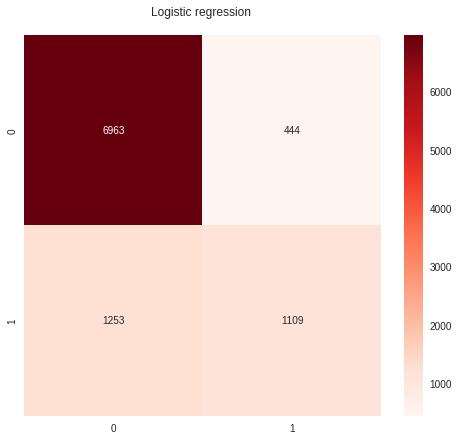

In [ ]:
## Visualization
plt.figure(figsize=[8,7])
sns.heatmap(cm1, cmap='Reds', annot=True, fmt='.0f')
plt.title('Logistic regression \n')
plt.show()

In [ ]:
#SVM 
from sklearn.svm import SVC, SVR
SVCreg = SVC(kernel = 'linear', C = 0.001, tol = 1e-5)
SVCreg.fit(X_train_scaled,y_train)
y_pred = SVCreg.predict(X_test_scaled)  ##
SVCreg_score =  accuracy_score(y_test, y_pred)
print('SVM Regression (scaled data) accuracy score: {0:0.4f}'. format(SVCreg_score))

SVM Regression (scaled data) accuracy score: 0.8034


In [ ]:
cm_SVCreg =  classification_report(y_test, y_pred) 
print(cm_SVCreg)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7407
           1       0.84      0.23      0.36      2362

    accuracy                           0.80      9769
   macro avg       0.82      0.61      0.62      9769
weighted avg       0.81      0.80      0.76      9769



In [ ]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 =  confusion_matrix(y_test, y_pred)
print('SVMLogistic Regression Confusion Matrix \n')
print(cm2)

SVMLogistic Regression Confusion Matrix 

[[7305  102]
 [1819  543]]


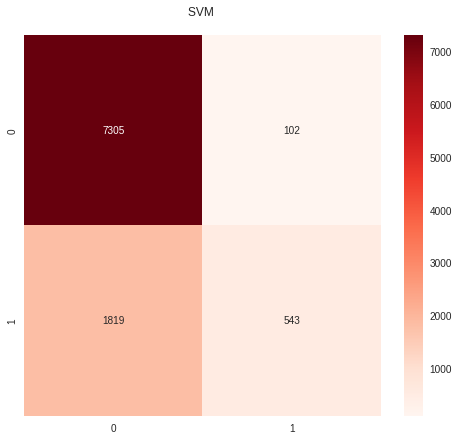

In [ ]:
## Visualization
plt.figure(figsize=[8,7])
sns.heatmap(cm2, cmap='Reds', annot=True, fmt='.0f')
plt.title('SVM \n')
plt.show()

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
criterion='entropy'
n_estimators=100
y_pred = rfc.predict(X_test) 
rfc_score =  accuracy_score(y_test, y_pred)
print('Random Forest Model accuracy score : {0:0.4f}'. format(rfc_score ))

Random Forest Model accuracy score : 0.8497


In [ ]:
cm_rfc =  classification_report(y_test, y_pred)
print(cm_rfc)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7407
           1       0.72      0.63      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.84      0.85      0.85      9769



In [ ]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Binary Labels \n')
print(cm)

Confusion Matrix for Binary Labels 

[[6823  584]
 [ 884 1478]]


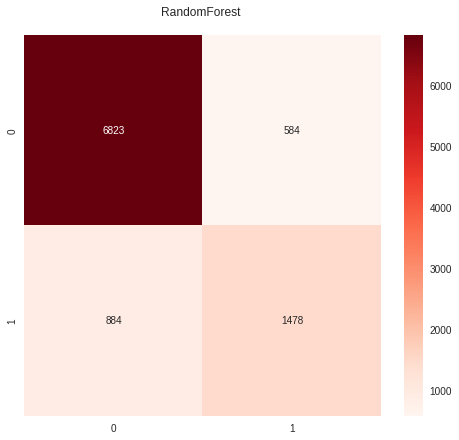

In [ ]:
## Visualization
plt.figure(figsize=[8,7])
sns.heatmap(cm, cmap='Reds', annot=True, fmt='.0f')
plt.title('RandomForest \n')
plt.show()

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Treereg=DecisionTreeClassifier(criterion='entropy',max_depth=3)
Treereg.fit(X_train_scaled,y_train)
y_pred = Treereg.predict(X_test_scaled)  ##
Treereg_score =  accuracy_score(y_test, y_pred)
print('DecisionTree Regression (scaled data) accuracy score: {0:0.4f}'. format(Treereg_score))

DecisionTree Regression (scaled data) accuracy score: 0.8398


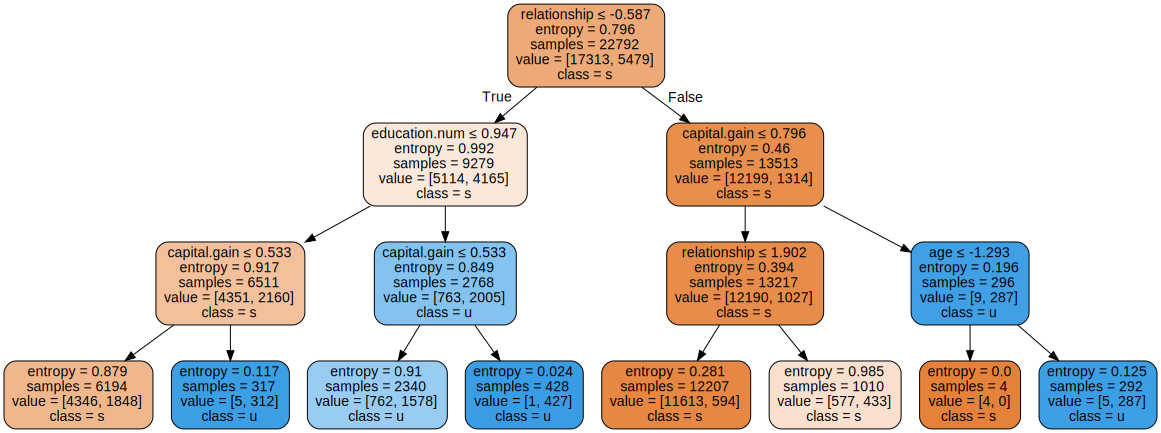

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(Treereg,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = X_train_scaled.columns,  # feature 이름
                               class_names = 'subscription',  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)              
graph

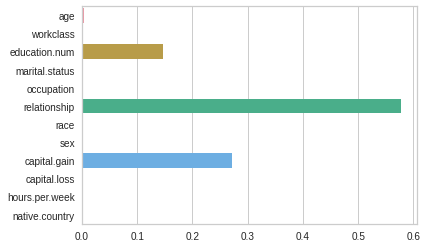

In [ ]:
## Decision Tree Feature Importance
import seaborn as sns
sns.barplot(Treereg.feature_importances_, y=X_train_scaled.columns)

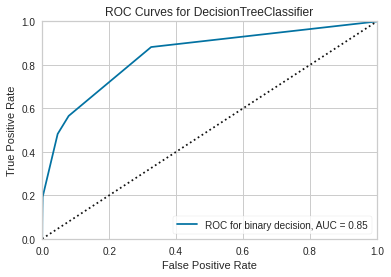

In [ ]:
## Tree ROC curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(Treereg, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

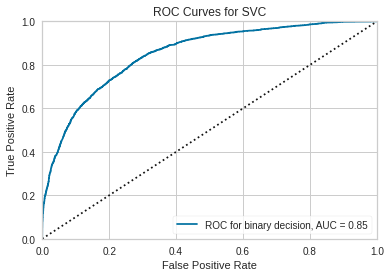

In [ ]:
## SVM ROC curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SVCreg, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

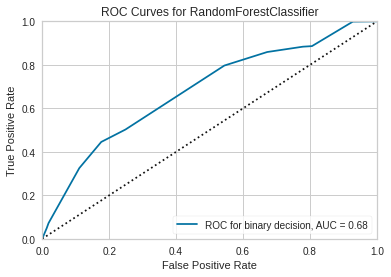

In [ ]:
## RandomForest ROC curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rfc, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

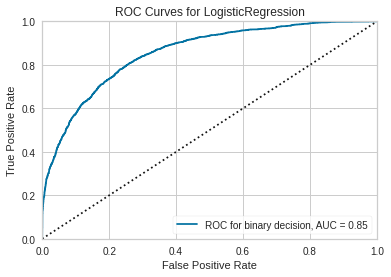

In [ ]:
## RandomForest ROC curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(logreg, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()